# Redes Neuronales

## Red Neuronal Multicapa

# XOR


Los datos los traduccimos a lenguaje computacional de la siguiente manera

In [6]:
import numpy as np

# Explicación.
Importa la librería NumPy, usada para cálculos numéricos y manejo de arreglos que son los vectores y matrices.
Todas las operaciones de red neuronal pesos, entradas, salidas se realizarán con matrices NumPy.


Los datos los traduccimos a lenguaje computacional de la siguiente manera

In [3]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Explicación.
Aquí se definen los datos de entrenamiento:
- X: entradas o sea pares de bits.

- y: salidas esperadas o searesultado del XOR.

# Red neuronal multicapa
Definir el modelo de red neuronal

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

modelo = Sequential([
    Dense(4, activation='relu', input_dim=2),
    Dense(1, activation='sigmoid')
])

# Explicación.
Aquí se construye el modelo de red neuronal con Keras, una API de TensorFlow.

- Sequential crea una red capa por capa, de forma lineal.

- Dense define una capa totalmente conectada, donde cada neurona de una capa se conecta con todas las neuronas de la capa siguiente.

Se utiliza Sequential para definir el modelo de red neuronal.

Se añaden capas de entrada y ocultas densamente conectadas (Dense) con activación ReLU y una capa de  salida con activación sigmoide para clasificar la respuesta en 1 y 0 (2 clases).

Compilar el modelo
Crear un optimizador Adam con una tasa de aprendizaje del 0.01

In [16]:
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.01
adam_optimizer = Adam(learning_rate=learning_rate)


# Explicación.
Se importa el optimizador Adam, es eficiente para redes neuronales.
- El parámetro: learning_rate = 0.01 controla qué tan rápido se actualizan los pesos del modelo durante el aprendizaje.

Un valor muy alto puede hacerlo inestable, y uno muy bajo lo haría muy lento.

In [17]:
modelo.compile(
    optimizer=adam_optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)


# Explicación.

- Compila el modelo: esto asocia el optimizador, la función de pérdida y la métrica a evaluar.

- optimizer=adam_optimizer: cómo se ajustan los pesos.

- loss='binary_crossentropy': mide qué tan bien el modelo predice valores binarios.

- metrics=['accuracy']: mostrará la precisión del modelo al evaluar.

Se compila el modelo utilizando el optimizador Adam y la función de pérdida de entropía cruzada categórica dispersa (binary_crossentropy) para la clasificación.

También se puede usar directamente el nombre del optimizador ('adam') en el argumento optimizer de la función compile. En lugar de definir un optimizador personalizado.

# Entrenar el modelo

In [18]:
history = modelo.fit(
    X, y,
    epochs=50,
    verbose=0,
)


# Explicación.
Se usa el modelo durante 50 épocas.
Cada época ajusta los pesos para reducir el error (loss).

Y los Parámetros:

- X, y: datos de entrada y salida.
- epochs = 50: número de veces que se verá todo el conjunto de datos.
- verbose = 0: suprime los mensajes de progreso.
El resultado (history) guarda información sobre el entrenamiento: pérdida y precisión por época.

Se entrena el modelo en los datos de entrenamiento utilizando fit. Se especifica el número de épocas a realizar durante el entrenamiento.

# Gráficando la funcion de pérdida

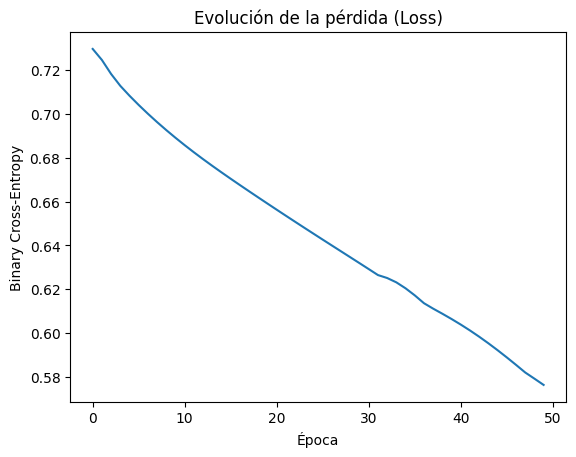

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Evolución de la pérdida (Loss)')
plt.xlabel('Época')
plt.ylabel('Binary Cross-Entropy')
plt.show()

Esta celda está la grafica y muestra cómo disminuye el error del modelo conforme aprende.
Donde:
- history.history['loss'] contiene la pérdida (error) registrada en cada época.
- plt.plot(...) dibuja una línea que muestra esa evolución.

Y los ejes:

- X → Épocas (iteraciones de entrenamiento)
- Y → Pérdida (qué tanto se equivoca el modelo)

Entonces si la curva baja con el tiempo, significa que el modelo está aprendiendo correctamente.

Con un entrenamiento bueno mostrará una curva descendente.

Se nota que la función de pérdida debe tender hacia cero.

# Evaluación
Evaluar el modelo en el conjunto de prueba

In [21]:
loss, accuracy = modelo.evaluate(X, y)
print(f'Loss: {loss}, Accuracy: {accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.7500 - loss: 0.5729
Loss: 0.5729049444198608, Accuracy: 0.75


# Explicación.
Evalúa el modelo con los mismos datos de entrenamiento.

Se evalúa el rendimiento del modelo en el conjunto de prueba utilizando evaluate. Se obtienen la pérdida y la precisión del modelo en los datos de prueba.

**Predicción**
Hacer predicciones y comparar las predicciones con los valores reales

In [20]:
pred = (modelo.predict(X) > 0.5).astype(int)
for i, (inp, p) in enumerate(zip(X, pred)):
    print(f"{inp} -> {p[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[0 0] -> 1
[0 1] -> 1
[1 0] -> 1
[1 1] -> 0


# Explicación.
Genera las predicciones del modelo para los mismos datos de entrada.